In [1]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installatio

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


# Import Library yang Dibutuhkan

In [3]:
# Library umum
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import random
import zipfile

# TensorFlow dan Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2

from google.colab import drive

# Pengambilan dan Download Dataset

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
with zipfile.ZipFile('/content/drive/My Drive/Capstone_C242-PS328/Dataset/Dataset_Gabungan/Plant_leave_diseases_dataset_with_augmentation.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')
print(os.listdir('/content/dataset'))

['Plant_leave_diseases_dataset_with_augmentation']


# Exploratory Data Analysis

In [6]:
dataset_dir = '/content/dataset/Plant_leave_diseases_dataset_with_augmentation'

# Cek jumlah gambar per kelas penyakit pada tanaman

In [8]:
class_folders = os.listdir(dataset_dir)
class_counts = []
for class_name in class_folders:
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts.append((class_name, num_images))

print("Class counts (Class Name, Number of Images):")
for class_name, num_images in class_counts:
    print(f"Class: {class_name}, Count: {num_images}")

total_images = sum(num_images for _, num_images in class_counts)
print(f"\nTotal images in all classes: {total_images}")


Class counts (Class Name, Number of Images):
Class: Potato___Early_blight, Count: 1000
Class: Tomato___Target_Spot, Count: 1404
Class: Orange___Haunglongbing_(Citrus_greening), Count: 2100
Class: Apple___Cedar_apple_rust, Count: 1000
Class: Squash___Powdery_mildew, Count: 1835
Class: Potato___Late_blight, Count: 1000
Class: Tomato___Bacterial_spot, Count: 2127
Class: Pepper,_bell___Bacterial_spot, Count: 1000
Class: Corn___healthy, Count: 1162
Class: Potato___healthy, Count: 1000
Class: Cherry___Powdery_mildew, Count: 1052
Class: Grape___Esca_(Black_Measles), Count: 1383
Class: Apple___Black_rot, Count: 1000
Class: Tomato___Early_blight, Count: 1000
Class: Soybean___healthy, Count: 2100
Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Count: 2100
Class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Count: 1076
Class: Grape___Black_rot, Count: 1180
Class: Background_without_leaves, Count: 1143
Class: Tomato___Septoria_leaf_spot, Count: 1771
Class: Tomato___healthy, Count: 1591
Class: Strawb

# Memisahkan nama kelas dan jumlah gambar ke dua list terpisah

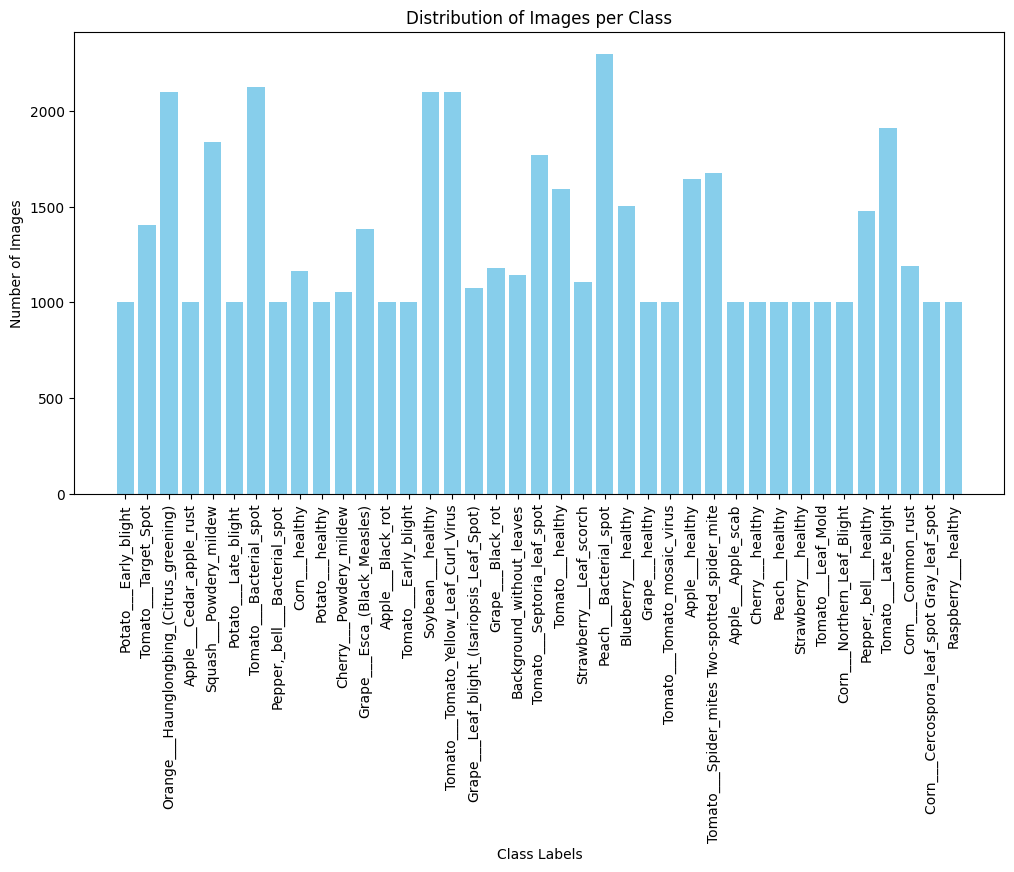

In [9]:
class_names = [item[0] for item in class_counts]
image_counts = [item[1] for item in class_counts]
plt.figure(figsize=(12, 6))
plt.bar(class_names, image_counts, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=90)
plt.show()

In [10]:
import os
all_diseases = sorted(os.listdir(dataset_dir))
plants = []
diseases = []

for cls in all_diseases:
    plant = cls.split("___")[0]
    disease = cls.split("___")[1] if len(cls.split("___")) > 1 else "healthy"
    if plant not in plants:
        plants.append(plant)
    if disease != "healthy" and disease not in diseases:
        diseases.append(disease)

num_plants = len(plants)
print(f"Number of Plants: {num_plants} plants")
print("Kind of Plants: ")
for i, plant in enumerate(plants):
    print(f"{i+1}. {plant}")

num_diseases = len(diseases)
print(f"\nNumber of Diseases: {num_diseases} diseases")
print("Kind of Diseases: ")
for i, disease in enumerate(diseases):
    print(f"{i+1}. {disease}")


Number of Plants: 15 plants
Kind of Plants: 
1. Apple
2. Background_without_leaves
3. Blueberry
4. Cherry
5. Corn
6. Grape
7. Orange
8. Peach
9. Pepper,_bell
10. Potato
11. Raspberry
12. Soybean
13. Squash
14. Strawberry
15. Tomato

Number of Diseases: 20 diseases
Kind of Diseases: 
1. Apple_scab
2. Black_rot
3. Cedar_apple_rust
4. Powdery_mildew
5. Cercospora_leaf_spot Gray_leaf_spot
6. Common_rust
7. Northern_Leaf_Blight
8. Esca_(Black_Measles)
9. Leaf_blight_(Isariopsis_Leaf_Spot)
10. Haunglongbing_(Citrus_greening)
11. Bacterial_spot
12. Early_blight
13. Late_blight
14. Leaf_scorch
15. Leaf_Mold
16. Septoria_leaf_spot
17. Spider_mites Two-spotted_spider_mite
18. Target_Spot
19. Tomato_Yellow_Leaf_Curl_Virus
20. Tomato_mosaic_virus


# Menampilkan gambar-gambar secara grid 5 gambar per baris

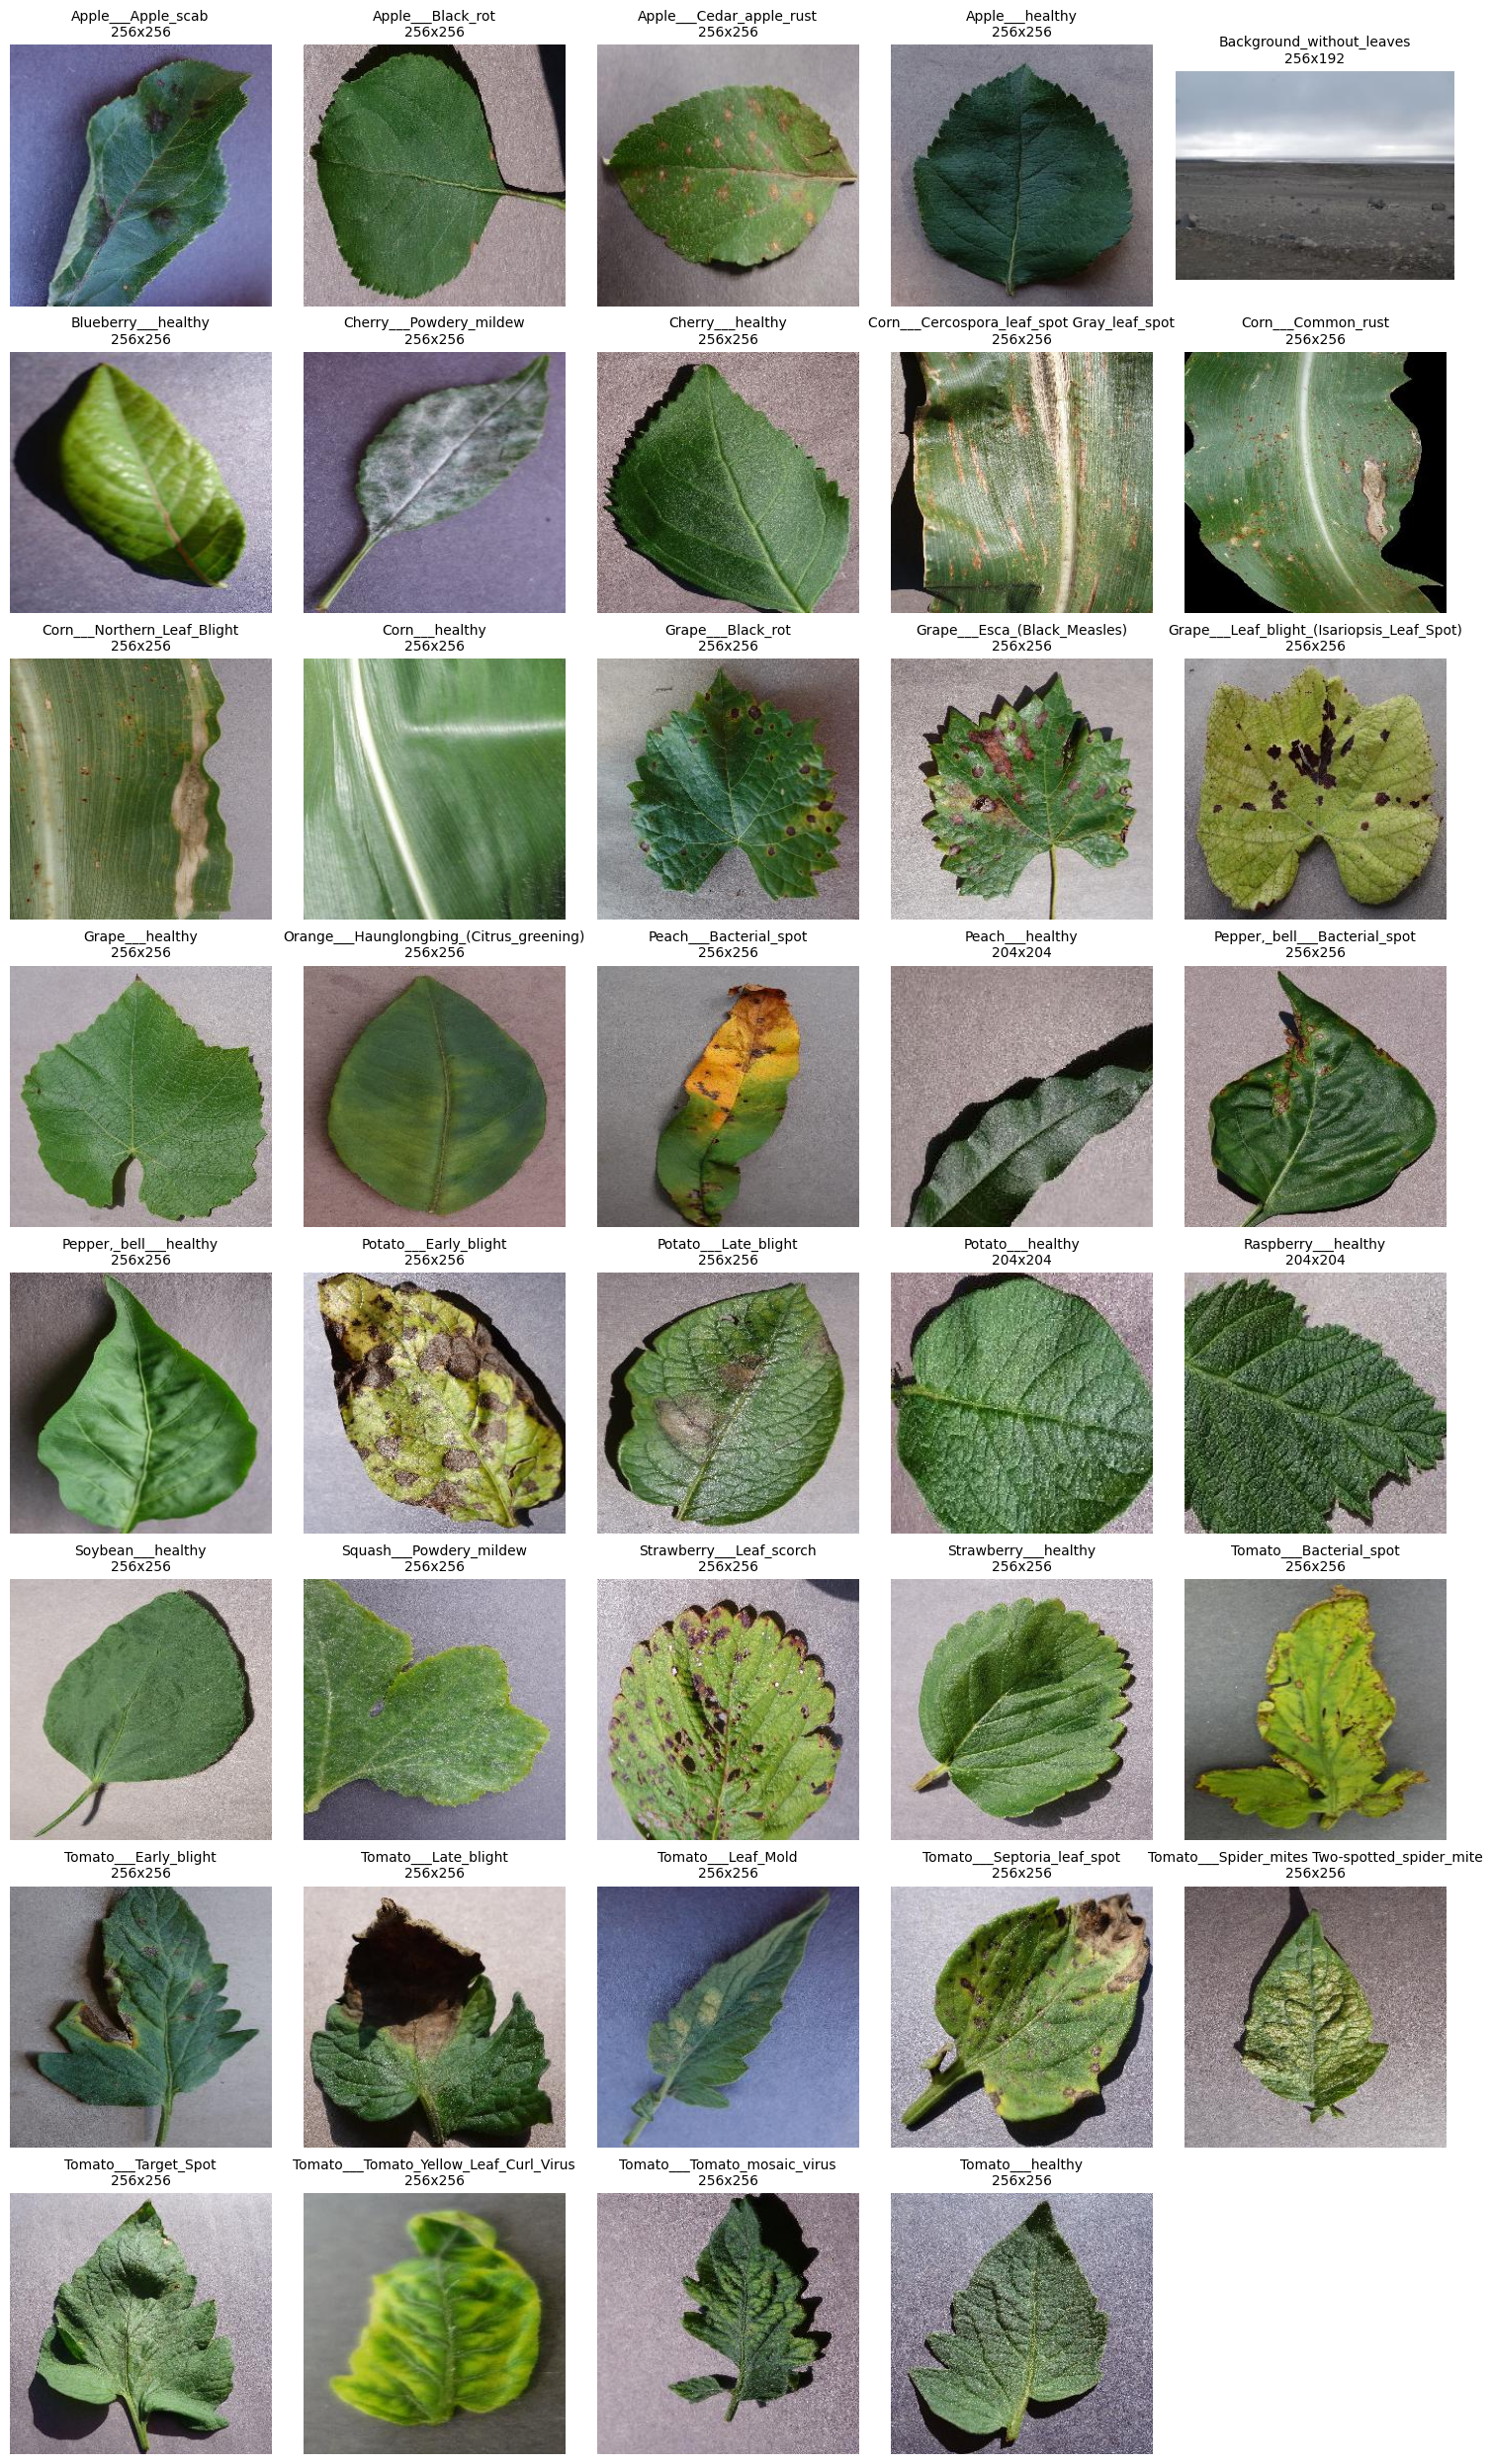

In [11]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

class_folders = sorted(os.listdir(dataset_dir))
random_images = []
labels = []

for class_name in class_folders:
    class_path = os.path.join(dataset_dir, class_name)

    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)
        random_image = random.choice(image_files)
        image_path = os.path.join(class_path, random_image)
        image = Image.open(image_path)
        image_size = image.size
        random_images.append(image)
        labels.append(f"{class_name}\n{image_size[0]}x{image_size[1]}")

fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 25))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i < len(random_images):
        ax.imshow(random_images[i])
        ax.set_title(labels[i], fontsize=10)
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


# Data PreProcessing

In [12]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

split_dir = '/content/split_dataset'
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Membuat direktori train, val, dan test
os.makedirs(os.path.join(split_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(split_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(split_dir, 'test'), exist_ok=True)
class_names = os.listdir(dataset_dir)

for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)
        random.shuffle(image_files)
        num_images = len(image_files)
        train_end = int(train_ratio * num_images)
        val_end = int((train_ratio + val_ratio) * num_images)

        # Memisahkan gambar untuk masing-masing subset
        train_images = image_files[:train_end]
        val_images = image_files[train_end:val_end]
        test_images = image_files[val_end:]
        os.makedirs(os.path.join(split_dir, 'train', class_name), exist_ok=True)
        os.makedirs(os.path.join(split_dir, 'val', class_name), exist_ok=True)
        os.makedirs(os.path.join(split_dir, 'test', class_name), exist_ok=True)

        # Memindahkan gambar ke direktori yang sesuai
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(split_dir, 'train', class_name, img))

        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(split_dir, 'val', class_name, img))

        for img in test_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(split_dir, 'test', class_name, img))

# Verifikasi bahwa folder sudah berisi gambar
print("Train Folder:")
print(os.listdir(os.path.join(split_dir, 'train')))
print("Validation Folder:")
print(os.listdir(os.path.join(split_dir, 'val')))
print("Test Folder:")
print(os.listdir(os.path.join(split_dir, 'test')))

Train Folder:
['Potato___Early_blight', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Cedar_apple_rust', 'Squash___Powdery_mildew', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Corn___healthy', 'Potato___healthy', 'Cherry___Powdery_mildew', 'Grape___Esca_(Black_Measles)', 'Apple___Black_rot', 'Tomato___Early_blight', 'Soybean___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___Black_rot', 'Background_without_leaves', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Strawberry___Leaf_scorch', 'Peach___Bacterial_spot', 'Blueberry___healthy', 'Grape___healthy', 'Tomato___Tomato_mosaic_virus', 'Apple___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___Apple_scab', 'Cherry___healthy', 'Peach___healthy', 'Strawberry___healthy', 'Tomato___Leaf_Mold', 'Corn___Northern_Leaf_Blight', 'Pepper,_bell___healthy', 'Tomato___Late_blight', 'Corn___Common_r

# Menampilkan Jumlah Gambar di  Setiap Folder

In [13]:
def count_images_in_folder(folder_path):
    total_images = 0
    for class_folder in os.listdir(folder_path):
        class_folder_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_folder_path):
            total_images += len(os.listdir(class_folder_path))
    return total_images

train_dir = '/content/split_dataset/train'
val_dir = '/content/split_dataset/val'
test_dir = '/content/split_dataset/test'

train_images = count_images_in_folder(train_dir)
val_images = count_images_in_folder(val_dir)
test_images = count_images_in_folder(test_dir)

print(f"Jumlah gambar di folder 'train': {train_images}")
print(f"Jumlah gambar di folder 'val': {val_images}")
print(f"Jumlah gambar di folder 'test': {test_images}")

Jumlah gambar di folder 'train': 41457
Jumlah gambar di folder 'val': 5182
Jumlah gambar di folder 'test': 5193


# Augmentasi, Menampilkan Setiap Indeks dan Nama Kelas

In [14]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMAGE_SIZE = (256, 256)

train_dataset = image_dataset_from_directory(
    os.path.join(split_dir, 'train'),
    image_size=IMAGE_SIZE,
    batch_size=32,
    shuffle=True,
    seed=123
)

val_dataset = image_dataset_from_directory(
    os.path.join(split_dir, 'val'),
    image_size=IMAGE_SIZE,
    batch_size=32,
    shuffle=True,
    seed=123
)

test_dataset = image_dataset_from_directory(
    os.path.join(split_dir, 'test'),
    image_size=IMAGE_SIZE,
    batch_size=32,
    shuffle=False
)

# Daftar nama kelas dari train_dataset
class_names = train_dataset.class_names

# Menampilkan indeks dan nama kelas
for index, class_name in enumerate(class_names):
    print(f"Index: {index}, Class Name: {class_name}")

def format_image(image, label):
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0
    return image, label

train_dataset = train_dataset.map(format_image)
val_dataset = val_dataset.map(format_image)
test_dataset = test_dataset.map(format_image)


Found 41457 files belonging to 39 classes.
Found 5182 files belonging to 39 classes.
Found 5193 files belonging to 39 classes.
Index: 0, Class Name: Apple___Apple_scab
Index: 1, Class Name: Apple___Black_rot
Index: 2, Class Name: Apple___Cedar_apple_rust
Index: 3, Class Name: Apple___healthy
Index: 4, Class Name: Background_without_leaves
Index: 5, Class Name: Blueberry___healthy
Index: 6, Class Name: Cherry___Powdery_mildew
Index: 7, Class Name: Cherry___healthy
Index: 8, Class Name: Corn___Cercospora_leaf_spot Gray_leaf_spot
Index: 9, Class Name: Corn___Common_rust
Index: 10, Class Name: Corn___Northern_Leaf_Blight
Index: 11, Class Name: Corn___healthy
Index: 12, Class Name: Grape___Black_rot
Index: 13, Class Name: Grape___Esca_(Black_Measles)
Index: 14, Class Name: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Index: 15, Class Name: Grape___healthy
Index: 16, Class Name: Orange___Haunglongbing_(Citrus_greening)
Index: 17, Class Name: Peach___Bacterial_spot
Index: 18, Class Name: Peach_

# Load Model

In [15]:
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Rescaling

input_layer = Input(shape=(256, 256, 3))
x = Rescaling(1.0 / 255)(input_layer)
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.GlobalAveragePooling2D(name='global_avg_pool')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output_layer = layers.Dense(39, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856 

# Compile Model

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callback

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]


# Training Model

In [18]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
1296/1296 [==============================] - 33s 21ms/step - loss: 2.3939 - accuracy: 0.3053 - val_loss: 1.3800 - val_accuracy: 0.5818
Epoch 2/30
   4/1296 [..............................] - ETA: 27s - loss: 1.7176 - accuracy: 0.4609 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1296/1296 [==============================] - 26s 20ms/step - loss: 1.1455 - accuracy: 0.6423 - val_loss: 0.9287 - val_accuracy: 0.7109
Epoch 3/30
1296/1296 [==============================] - 25s 20ms/step - loss: 0.7593 - accuracy: 0.7601 - val_loss: 0.6118 - val_accuracy: 0.8115
Epoch 4/30
1296/1296 [==============================] - 26s 20ms/step - loss: 0.5856 - accuracy: 0.8139 - val_loss: 0.4229 - val_accuracy: 0.8736
Epoch 5/30
1296/1296 [==============================] - 26s 20ms/step - loss: 0.4745 - accuracy: 0.8456 - val_loss: 0.4090 - val_accuracy: 0.8767
Epoch 6/30
1296/1296 [==============================] - 25s 20ms/step - loss: 0.4179 - accuracy: 0.8652 - val_loss: 0.3341 - val_accuracy: 0.8962
Epoch 7/30
1296/1296 [==============================] - 26s 20ms/step - loss: 0.3524 - accuracy: 0.8861 - val_loss: 0.2510 - val_accuracy: 0.9251
Epoch 8/30
1296/1296 [==============================] - 26s 20ms/step - loss: 0.3113 - accuracy: 0.8998 - val_loss: 0.2813 - val_accura

# Visualisasi Hasil Training
## Grafik untuk visualisasi akurasi dan loss pada train dan validation

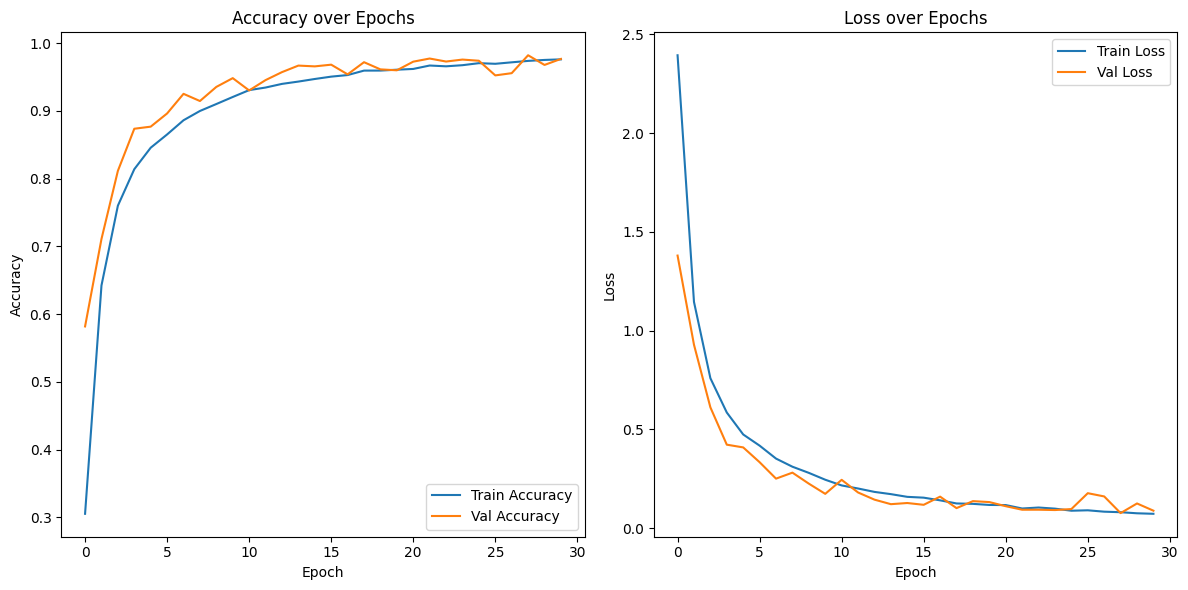

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Evaluasi model pada data testing

In [20]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")

163/163 [==============================] - 2s 13ms/step - loss: 0.0747 - accuracy: 0.9765
Test accuracy: 0.9765068292617798


# Classification Report

In [21]:
from sklearn.metrics import classification_report
y_true = []
y_pred = []
for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

print(classification_report(y_true, y_pred))


1/1 [==============================] - 0s 88ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       1.00      1.00      1.00       100
           2       0.99      1.00      1.00       100
           3       0.88      0.99      0.93       165
           4       1.00      0.98      0.99       115
           5       1.00      0.99      0.99       151
           6       0.99      0.99      0.99       106
           7       1.00      0.93      0.96       100
           8       0.93      0.93      0.93       100
           9       1.00      1.00      1.00       120
          10       0.91      0.93      0.92       100
          11       1.00      1.00      1.00       117
          12       0.99      0.92      0.95       118
          13       0.99      0.99      0.99       139
          14       1.00      1.00      1.00       108
          15       0.99      0.99      0.99       100
          16       0.99      

# Menampilkan Confusion Matrix

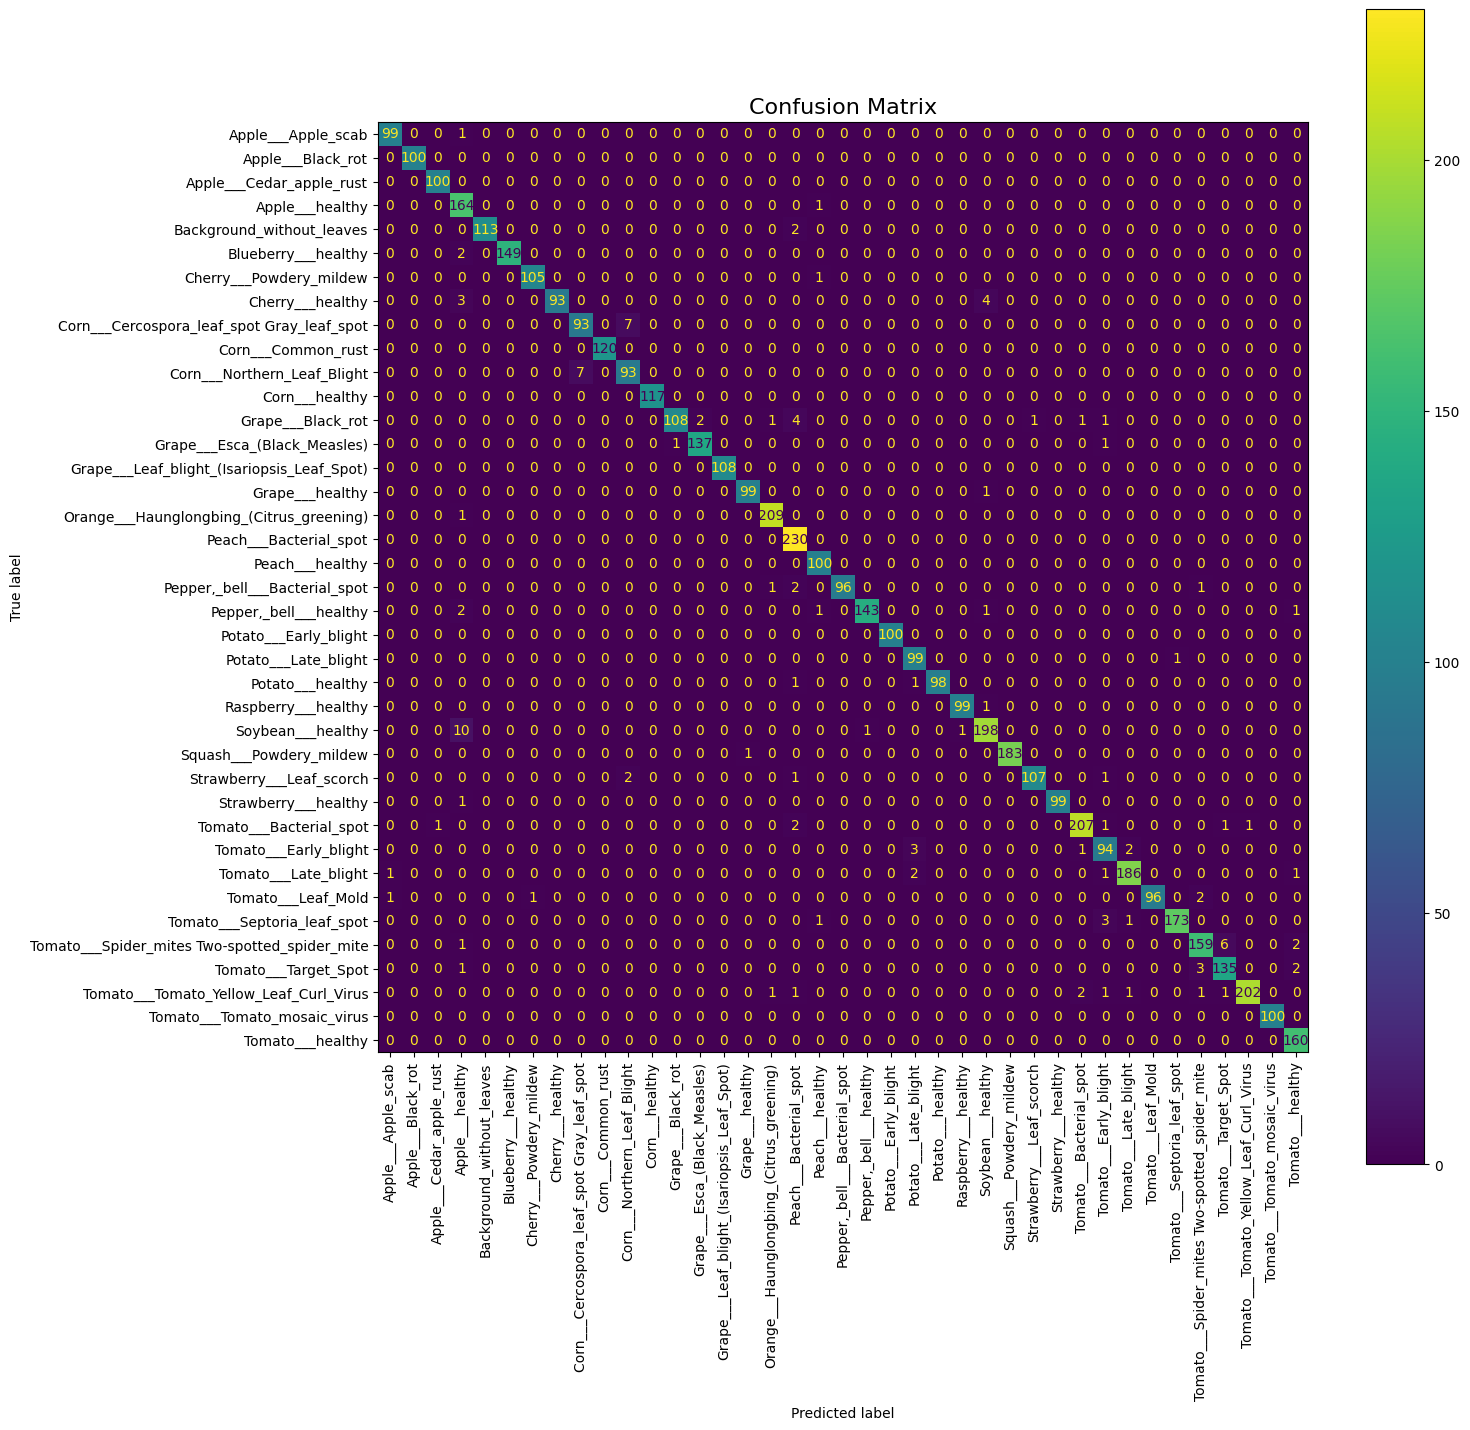

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(15, 15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', ax=ax, xticks_rotation='vertical')

plt.title('Confusion Matrix', fontsize=16)
plt.show()


# Testing Prediksi dari Gambar Inputan

In [32]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Memuat gambar dan mengubah ukurannya sesuai ukuran model
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, img

def predict_image(image_path, model, class_names):
    processed_image, original_img = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    return predicted_class, original_img


In [33]:
def test_image(model, class_names):
    while True:
        user_input = input("Apakah Anda ingin mengunggah gambar untuk prediksi? (yes/no): ").strip().lower()
        if user_input != 'yes':
            print("Terima kasih! Program selesai.")
            break
        uploaded = files.upload()

        for file_name in uploaded.keys():
            print(f"Gambar yang diunggah: {file_name}")
            predicted_class, original_img = predict_image(file_name, model, class_names)
            print(f"Hasil Prediksi: {predicted_class}")

            plt.imshow(original_img)
            plt.title(f"Prediksi: {predicted_class}")
            plt.axis('off')
            plt.show()


Apakah Anda ingin mengunggah gambar untuk prediksi? (yes/no): yes


Saving image (981).JPG to image (981).JPG
Gambar yang diunggah: image (981).JPG
1/1 [==============================] - 0s 202ms/step
Hasil Prediksi: Tomato___Tomato_Yellow_Leaf_Curl_Virus


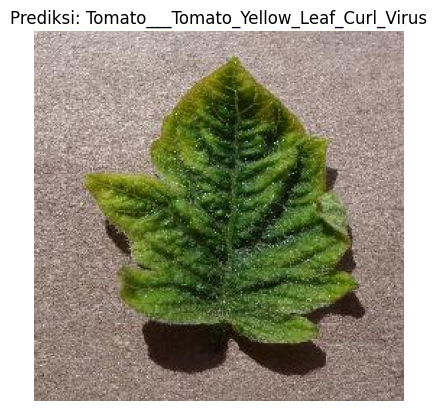

Apakah Anda ingin mengunggah gambar untuk prediksi? (yes/no): yes


Saving image (977).JPG to image (977).JPG
Gambar yang diunggah: image (977).JPG
1/1 [==============================] - 0s 21ms/step
Hasil Prediksi: Corn___Northern_Leaf_Blight


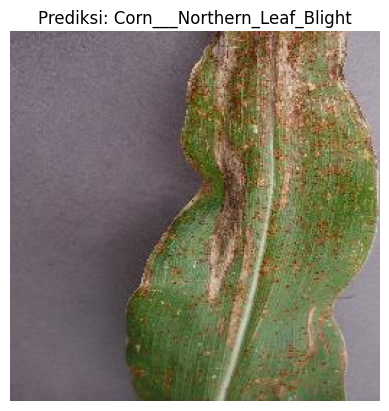

Apakah Anda ingin mengunggah gambar untuk prediksi? (yes/no): yes


Saving image (998).JPG to image (998).JPG
Gambar yang diunggah: image (998).JPG
1/1 [==============================] - 0s 22ms/step
Hasil Prediksi: Apple___Cedar_apple_rust


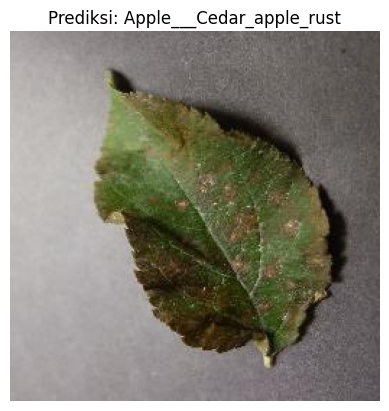

Apakah Anda ingin mengunggah gambar untuk prediksi? (yes/no): no
Terima kasih! Program selesai.


In [34]:
model = model
test_image(model, class_names)


# Mengunduh Split Dataset (Train, Validation, Test)

In [36]:
import shutil
dataset_folder = '/content/dataset'

shutil.make_archive('split_dataset', 'zip', dataset_folder)

from google.colab import files
files.download('split_dataset.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Menyimpan Model dalam Format H5 dan SavedModel

In [37]:
import shutil
from google.colab import files

# Menyimpan model dalam format H5
model.save('model1.h5')
print("Model disimpan dalam format H5.")

# Menyimpan model dalam format SavedModel
model.save('model1_saved', save_format='tf')
print("Model disimpan dalam format SavedModel.")

# Mengunduh model H5 dan SavedModel ke lokal
files.download('model1.h5')
shutil.make_archive('saved_model1', 'zip', 'model1_saved')
files.download('saved_model1.zip')
print("Model H5 dan SavedModel berhasil diunduh.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model disimpan dalam format H5.
Model disimpan dalam format SavedModel.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model H5 dan SavedModel berhasil diunduh.


# Mengonversi model H5 ke format TensorFlow.js

In [40]:
!pip install tensorflowjs

In [41]:
!mkdir tfjs_model1

In [42]:
!tensorflowjs_converter --input_format keras model1.h5 tfjs_model1
print("Model berhasil dikonversi ke format TensorFlow.js.")

2024-11-28 14:04:38.561390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732802678.583484   17626 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732802678.590135   17626 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
Model berhasil dikonversi ke format TensorFlow.js.


In [48]:
shutil.make_archive('tfjs_model1', 'zip', 'tfjs_model1')
files.download('tfjs_model1.zip')
print("Model 1 TensorFlow.js berhasil diunduh.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model 1 TensorFlow.js berhasil diunduh.


In [45]:
# Menampilkan library yang terinstal beserta versinya
!pip freeze > requirements.txt
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>